In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-04-24 21:14:54,032] INFO in core: Started 


2019-10-24


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
M1,98.0,-0.091718,0.802290,-3.100050,-0.222527,0.133645,0.259045,1.420287,1.072758,-8.884009,23.204643,-1.848496
CSI 300,98.0,-0.018624,0.881320,-3.009172,-0.318271,0.246788,0.540889,1.403792,1.059499,-3.294262,20.174870,-1.455437
S&P 500,98.0,-0.099395,1.130559,-3.782368,-0.282517,0.149653,0.324703,3.152724,0.754481,-8.929770,33.717264,-0.742628
IRA,98.0,0.026757,2.082938,-7.145020,-0.008761,0.318348,0.666146,5.842479,0.470076,1.099383,46.663531,-1.261718


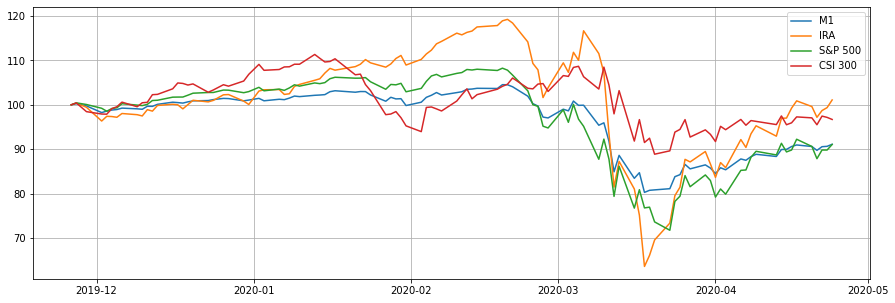

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

2020-03-26


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
M1,20.0,0.260999,1.086147,-1.459997,-0.535008,0.239995,0.922496,2.860004,1.117141,5.234459,2.397288,0.538435
IRA,20.0,0.750497,2.859962,-3.499993,-1.455046,1.114997,2.405037,7.360023,0.595420,15.249557,6.520484,0.407159
CSI 300,20.0,0.018220,1.855402,-4.065648,-1.138019,-0.259176,1.480242,3.734272,0.523122,0.037300,5.110030,-0.001596
S&P 500,20.0,0.437036,2.762207,-4.500487,-1.558353,0.292189,2.406040,6.716621,0.503009,8.334605,5.923944,0.251283


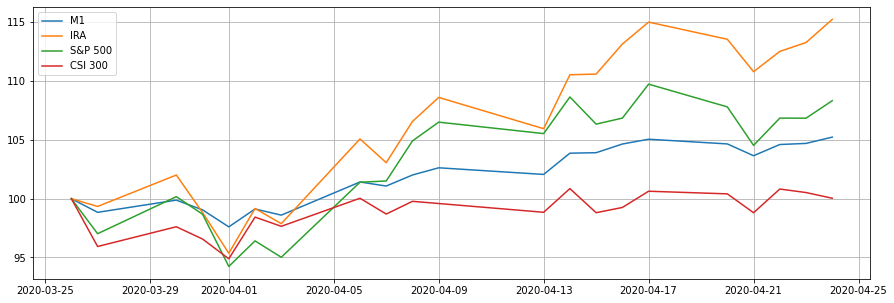

In [3]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 1)

In [ ]:
ret = frame.rolling(1).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(2, 2))